# THE NUMBER OF JUPYTER NOTEBOOK REPOS ON GITHUB

**Keith E. Maull<sup>^1</sup>**

September 17, 2017

1. NCAR Library, National Center for Atmospheric Research

## SUMMARY
Inspired by [NBEstimate](https://github.com/parente/nbestimate) which tracks the number of `.ipynb` files on Github, we want to explore **the number of Jupyter Notebook _repos_**, as we feel that is also a useful estimate of the total *usage* of notebook technology across a wide spectrum of activities.  This code may push the [rate limits](https://developer.github.com/v3/#rate-limiting) of the API, so please put the token in `gh_auth_token.txt` for best reproducibility results.

### EXPLORATION

In [1]:
# NOTE: make sure you put your API auth token in gh_auth_token.txt
with open('gh_auth_token.txt'
         ) as fi:
    GH_AUTH_TOKEN = fi.readlines()[0].strip()

In [2]:
# core imports
%matplotlib inline 
import pprint
import time 
import requests
import pandas as pd

### PRELIMINARIES
Lets warm up to the API and get the number of repos that are *public* and claim to have *Jupyter Notebooks* in them.

In [3]:
def gh_api(url):
    headers = {'Authorization': GH_AUTH_TOKEN}
    r = requests.get(url, headers=headers)

    if r.status_code == 200:
        data = r.json() # dict_keys(['total_count', 'incomplete_results', 'items'])
        return data
    else:
        print("E:{}/{}".format(r.status_code, r.content))

In [4]:
data = gh_api('https://api.github.com/search/repositories?q=language:"Jupyter Notebook"+is:public')

In [5]:
data['total_count'] # total repos at time notebook run (e.g. 397027 on 9/17/2018)

397027

### COUNTS

In [6]:
repo_data = {}
for y in range(2008,2019):
    resp = gh_api(
        'https://api.github.com/search/repositories?q=language:"Jupyter Notebook"+is:public+created:{}-01-01..{}-01-01'
        .format(y, y+1)
    )
    if resp:
        repo_data[y] = resp['total_count']
        print(y, end='.')


2008.2009.2010.2011.2012.2013.2014.2015.2016.2017.2018.

In [7]:
df = pd.DataFrame.from_dict(repo_data, orient='index', columns=['count'])
#df = df.rename({0: 'gh_ipynb_repo_count'}, axis='columns')

In [8]:
df

,count
2008,2
2009,1
2010,8
2011,51
2012,163
2013,568
2014,1840
2015,8292
2016,54845
2017,143618


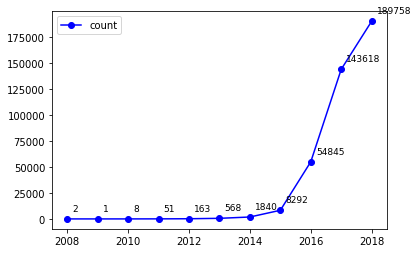

In [9]:
ax = df.plot(style='-o', color='blue')

for i, v in df.iterrows():
    ax.annotate(v['count'], (i,v),
                xytext=(5,8), textcoords='offset points',
                family='sans-serif', fontsize=9, color='black')

# OUTCOMES AND DISCUSSION
Clearly there is  a dramatic uptick in the number of Jupyter Notebook repos, especially since 2015, when there was a 600% increase from 2015-2015!